In [33]:
import json
import datetime

import requests
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
filter_list = [[-12.216796875000002,59.40036514079251],[25.576171875,59.40036514079251],[25.576171875,36.10237644873644],[-12.216796875000002,36.10237644873644],[-12.216796875000002,59.40036514079251]] # europe
# filter_list = [[-10.898437500000002,34.59704151614417],[34.10156250000001,34.59704151614417],[34.10156250000001,-35.17380831799957],[-10.898437500000002,-35.17380831799957],[-10.898437500000002,34.59704151614417]] # africa
# filter_list = [[-125.06835937500001,45.767522962149904],[-116.982421875,45.767522962149904],[-116.982421875,31.728167146023935],[-125.06835937500001,31.728167146023935],[-125.06835937500001,45.767522962149904]] # california
filters_str = json.dumps(filter_list, separators=(",", ":"))


In [42]:
# response = requests.get(f"http://127.0.0.1:9999/earthquake?coordinates={filters_str}&date_start=2015-01-01")
# response = requests.get(f"http://127.0.0.1:9999/earthquake?coordinates={filters_str}&date_start=2015-07-01&date_end=2016-07-01")
# response = requests.get(f"http://127.0.0.1:9999/earthquake?coordinates={filters_str}")
response = requests.get(f"http://127.0.0.1:9999/earthquake")
response_dict = response.json()

In [43]:
"""Convert response to pandas"""
eq_list = []
for eq in response_dict['data']:
    timestamp = datetime.datetime.fromtimestamp(eq['time']//1000)
    dataframe_fields = {
        "id": eq['id'],
        "mag": eq['mag'],
        "time": datetime.datetime.fromtimestamp(eq['time']//1000),
    }
    eq_list.append(dataframe_fields)

df = pd.DataFrame(eq_list)
df

,id,mag,time
0,1,1.93,1995-01-28 00:58:26
1,2,1.90,1995-01-28 00:55:35
2,3,3.50,1995-01-28 00:53:30
3,4,1.76,1995-01-28 00:44:05
4,5,1.62,1995-01-28 00:39:14
...,...,...,...
3292372,3292373,1.00,2023-03-21 01:22:45
3292373,3292374,4.50,2023-03-21 01:20:14
3292374,3292375,1.00,2023-03-21 01:16:18
3292375,3292376,1.06,2023-03-21 01:06:09


In [44]:
# pickling
df.to_pickle('./all_earthquakes.pkl')

In [47]:
# unpickling
df = pd.read_pickle('./all_earthquakes.pkl')
df.tail()

,id,mag,time
3292372,3292373,1.00,2023-03-21 01:22:45
3292373,3292374,4.50,2023-03-21 01:20:14
3292374,3292375,1.00,2023-03-21 01:16:18
3292375,3292376,1.06,2023-03-21 01:06:09
3292376,3292377,0.44,2023-03-21 01:02:50


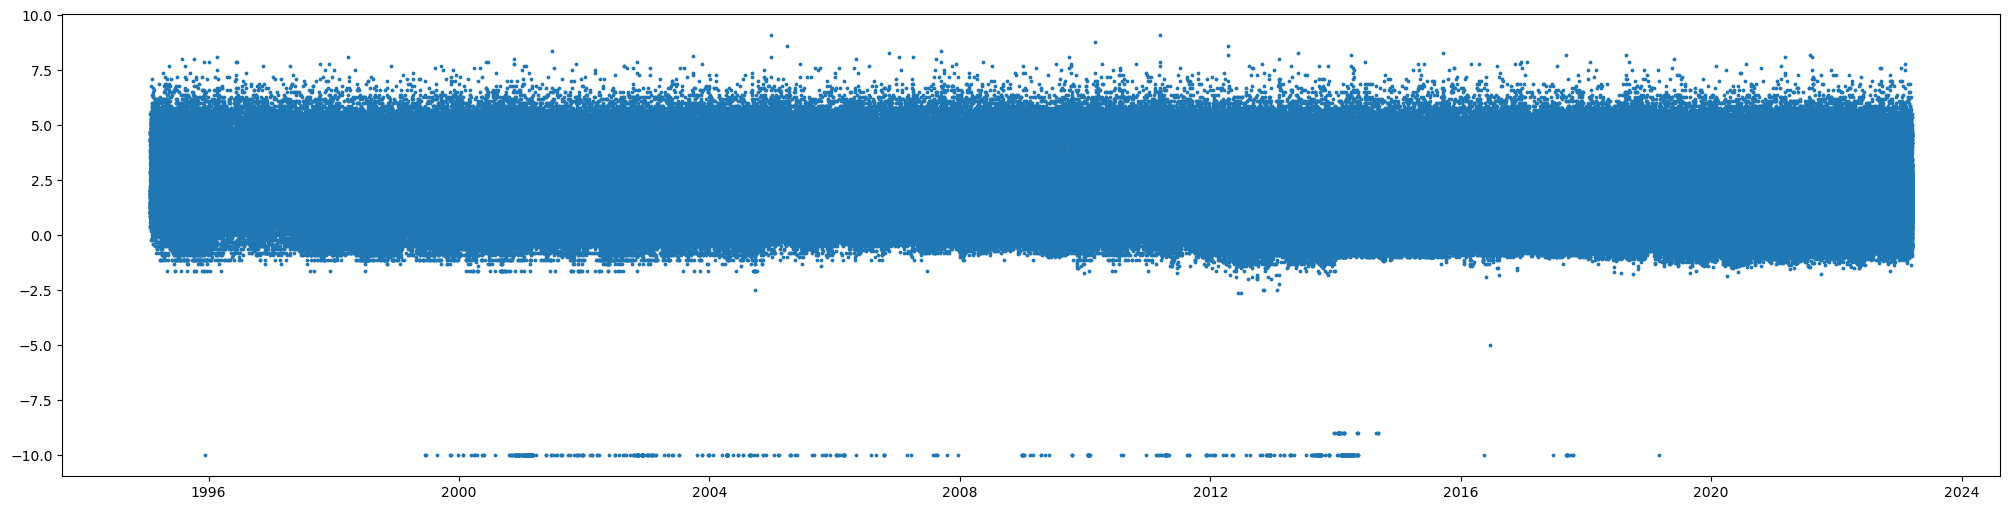

In [50]:
plt.figure(figsize=(25,6))
date_start = datetime.datetime(1995,1,27,0,0,0)
date_end = datetime.datetime(2023,3,16,0,0,0)

filtered = df[(date_start <= df['time']) & (df['time'] <= date_end)]
count = len(filtered)
plt.scatter(filtered['time'], filtered['mag'], s=[3])
# len(df[(date_start <= df['time']) & (df['time'] <= date_end)]['mag'])